# Naive Bayes Classification

- Naive Bayes models are extremely fast and simple classification algorithm
- Suitable for very-high dimensional datasets.
- Normally used as a baseline model for a classification problem

- We will focus on how naive bayes classifiers work.
- Using some example datasets

- Naive Bayes classifiers are built on Bayesian classification method.
- in Bayes Bayesian classification we find the probability of a label given some obsereved features

 $P(L \;|\; features)$ =  $\frac{P(features \;|\; L) \:P(L)}{p(features)}$

- Suppose we have two labels $L_{1} and \;L_{2}$
- Then one way to make this decision is to compute the ratio of the posterior probability for each label

 $\frac{P(L \;|\; features)}{P(L \;|\; features)} = \frac {P(features \;|\; L_{1})\; P(L_{1})} {P(features\; |\; L_{2})\; P(L_{2})}$ 

- All we need is now some model by which we can compute $P(features \;|\; L_{i})$ for each label
- Such a model is called a *generative model*

- We have different types of naive Bayes classifiers based on naive assumptions

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

- The preassumption of this classifier is that data from eeach label is drawn from a simple Gaussian distribution
- Means normal distribution

In [11]:
from sklearn.datasets import make_blobs


In [15]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5, )


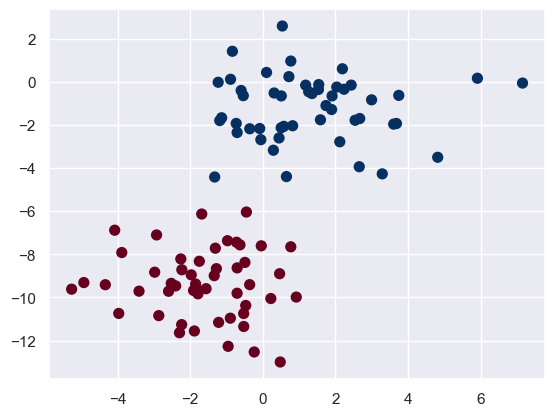

In [16]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
# x, y value
# c is matching the size of y
# s number of data points
# cmap color assignment

- The preassumption is that the data is described by a Gaussian distribution with no covariance between dimensions.
- We can fit the model by finding mean, and standard deviation of the points of each label


[(-8.0, 8.0), (-15.0, 5.0)]

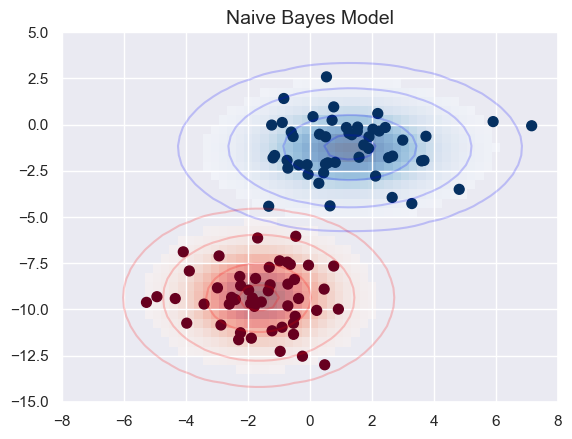

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

- The ellipses here represent the Gaussian generative model for each label with larger propbality towards the center
of the ellipses.
- Now we have the simple recipe to compute the likelihood $P(features \;|\; L_{1})$ for any data point
- Now we can compute the posterior ration and determine which label is the most probable for a given point

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [48]:
# Generating new data and predicting the label

rng = np.random.RandomState(42)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

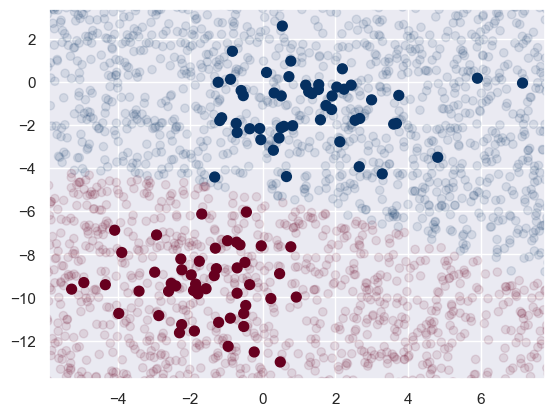

In [52]:
# Now plotting the decision boundry

plt.scatter(X[:,0], X[:,1], c=y, s = 50, cmap='RdBu')
lim = plt.axis()

plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew,  cmap='RdBu', alpha=0.1)
plt.axis(lim)

- Lighter points are new data points predicted (labeled)

In [23]:
# Using predict_proba allow us to see the label of each point
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ]])

## Multinomial Naive Bayes

- Multinomial distribution describes the probability of observing counts among a number of categories.
- So multinomial naive Bayes is most appropriate for features that represent counts or count rates.
- Here we model the data distribution with a best-fit multinomial distribution

## Example: classifying text

- Multinomial naive Bayes is often used is in text classification.
- Where the text features are related to word counts or frequencies within the documents to be classified.
- We will use sparse word count features from 20 Newsgroups corpus to show how we might classify these
short documents into categories

- Let's download the data and look at the target names

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- For simplicity we will download some of these categories and download the training and test set

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
             'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

- Representative entry from the data

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [7]:
train.target

array([2, 2, 1, ..., 2, 3, 1])

### Machine Learning steps

- Converting text into vector of numbers
- Using TF-IDF vectorizer
- Creating a pipeline that attaches it to a multinomial naive Bayes classifier

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

- With this pipeline we can apply the model to the training data and predict labels for test data.

In [8]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

### Confusion matrix

- Evaluating the performance of the estimator
- Using the confusion matrix between true and predicted labels for the test data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(113.92222222222219, 0.5, 'predcited label')

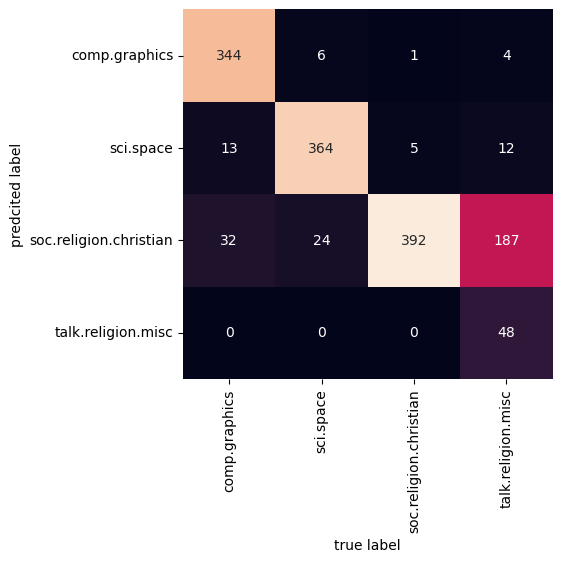

In [9]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predcited label')

- Confusion matrix for the multinomial naive Bayes text classifier

- Successfully separated space talk from computer talk
- But confused between religion talk and christianity talk

- Using the predict() method of this pipeline, we can determine the category of any string

- Utility function that will return the prediction for a single string

In [10]:
def predict_categories(s, train = train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

- Let's try it out

In [11]:
predict_categories('sending a payload to the ISS')

'sci.space'

In [12]:
predict_categories('discussing islam vs atheism')

'soc.religion.christian'

In [13]:
predict_categories('determining the screen resolution')

'comp.graphics'

- This is the simple probability model for the (weighted) frequency of each word in the string.
- Even a naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be effective

## When to use Naive Bayes

- They are extremely fast for both training and predicting
- They provide  straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few tunable paramaters

- Naive Bayesian classifier can be a good choice for a baseline classification
- To explore before going for more sophisticated models

## Naive Bayes Performance

- The perform well in below situation

- For very welll separated categories, when model complexities is less important
- For very high-dimensional data, when model complexities is less important

- Overalll Naive Bayes classification is a good starting point for classification task.

# Linear Regression

- Linear regression models are a good starting point for a regression tasks.
- Linear regression models can be fit very quickly and very interpretable
- Simple linear regression models can be extended to more complicated data behavior

- We will explore how linear models can be generalized to account for more complicated patterns in data

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

- Simple linear regression, a straight line fits to data
- A straight line fit a model of the form $y = ax + b$
- Where $a$ is *slope*, and $b$ is *intercept*

- Let's consider a data with a slope of 2 and intercept of -5

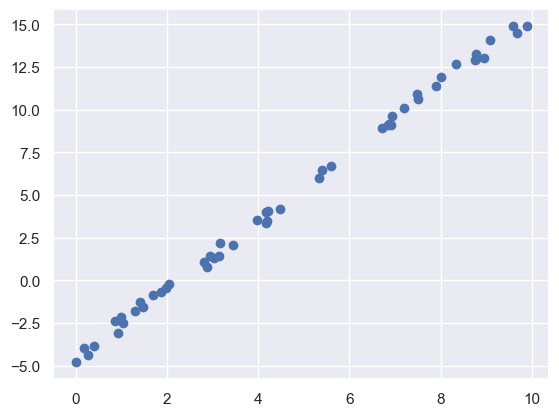

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y)

- Data for linear regression

- Using Sklearn Linear Regression estimator to fit this data and construct best-fit line

In [21]:
# Choose a model
from sklearn.linear_model import LinearRegression

# Intitialize the model
model = LinearRegression(fit_intercept=True)


In [22]:
# Fitting the data
model.fit(x[:,np.newaxis], y) # transforming X data into feature matrix of [n_samples, n_features]


LinearRegression()

In [7]:
# creating test data
xfit = np.linspace(0, 10, 1000) # start, stop and number of samples to generate

yfit = model.predict(xfit[:, np.newaxis]) # transforming xfit data into feature matrix

<IPython.core.display.Javascript object>

NameError: name 'model' is not defined

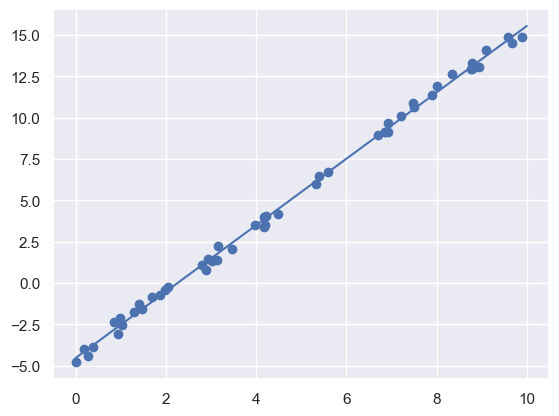

In [26]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

- Let's see the model *slope* and *intecept*

In [31]:
print('Model slope:', model.coef_)
print('Model intercept:', model.intercept_)

Model slope: [2.00823024]
Model intercept: -4.5336529720991265


- The results are very much similar to the inputs

## Multidimensional linear models

- Lets see how to handle mutlidimensional model
- $y = a_{0} + a_{1}x_{1} + a_{2}x_{2} +.... $
- Geometrically this is something line fitting a plane to points in three dimensions

In [32]:
# Create the dataset
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # uniform distribution sample size of 100 rows and 3 columns
y = 0.5 + np.dot(X, [1.5, -2, 1])

In [33]:
model.fit(X, y)

LinearRegression()

In [34]:
print(model.intercept_)
print(model.coef_)

0.500000000000012
[ 1.5 -2.   1. ]


- Above example is just showing the fit of Linear Regression into multidimensional data

- $y$ data is constructed from three random $x$ values and the linear regression recorvers the coefficients used 
to constructed the data

- Using linear regression estimator to fit lines, planes or hyperplanes to our data
- This approach is strictly limited to linear relationships between variables

## Basic Function regression

- How about adating linear regression to non-linear relationships between variables
- We can do this by transforming the data according to basis functions.
- Using $PolynomialRegression$ pipeline used in hyperparameter and model validation and feature engineering

- $y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + a_{3}x_{3}.... $

- The idea is to transform our $x_{1}, x_{2}, x_{3}$ and so on from single dimensional input x.
- That is we let $x_{n} = f_{n}(x)$
- Where $f_{n}()$ is some function that transform our data

For example: $f_{n}(x) = x^{n}$, our model becomes polynomial regression
-  $y = a_{0} + a_{1}x_{1} + a_{2}x^{2} + a_{3}x^{3}.... $

- Here we have taken one-dimensional $x$ value and projected into higher-dimension so that a linear fit can fit more complicated relationships between $x$ and $y$

### Polynomial basis function

In [5]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

<IPython.core.display.Javascript object>

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

- Above transformer has has converted our one-dimensional array into a three-dimensional array by taking the 
exponent of each value
- This high-dimensional data representation can then be plugged into a linear regression

- Let's make a 7th degree polynomial model

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

<IPython.core.display.Javascript object>

- Now we can use linea model to fit much more complicated relationships between $x$ and $y$

In [8]:
rng = np.random.RandomState(1)

xfit = np.linspace(0, 10, 1000) 

x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [9]:
yfit = poly_model.predict(xfit[:, np.newaxis])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

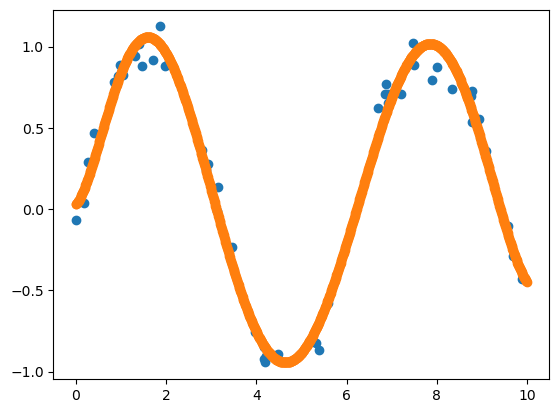

In [10]:
plt.scatter(x, y)
plt.scatter(xfit, yfit)

- A linear polynomial fit to nonlinear training data

- The linear model, through the use of 7th -order polynomial basis function can provide excellent fit to this nonlinear data


### Gaussian basis function

- Another bases fit is a sum of Gaussian bases
- This can be done by writing custom transformer that will create it.

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N =N
        self.width_factor = width_factor
        
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        #create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:,:,np.newaxis], self.centers_,self.width_, axis=1)


In [ ]:
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

- A Gaussian basis function fit computed with a custom transformer

## Regularization

- The basis functions makes our model more flexible in linear regression.
- The problem lies in the fact that it can lead to overfitting.
- For example: we choose to many Gaussian basis functions, we end up with results that don't look good,

In [9]:
# Making pipeline by using Gaussian features and model instantiation
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())

<IPython.core.display.Javascript object>

In [10]:
model.fit(x[:, np.newaxis], y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pipeline(steps=[('gaussianfeatures', GaussianFeatures(N=30)),
                ('linearregression', LinearRegression())])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

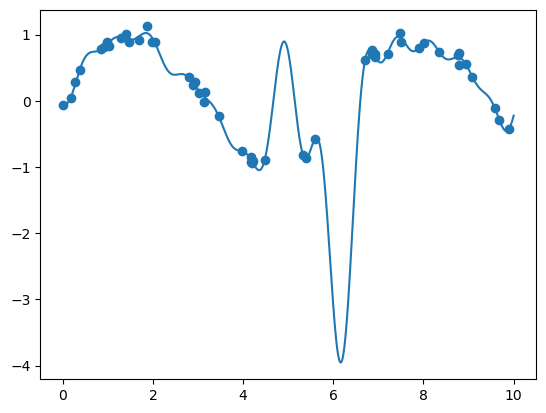

In [11]:
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

- Above data projected to the 30-dimensional basis
- The model is too much flexible
- Goes to extreme values between locations

- Let's plot the coefficients of the Gaussian bases with respect to their locations

In [17]:
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
              model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0, 10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

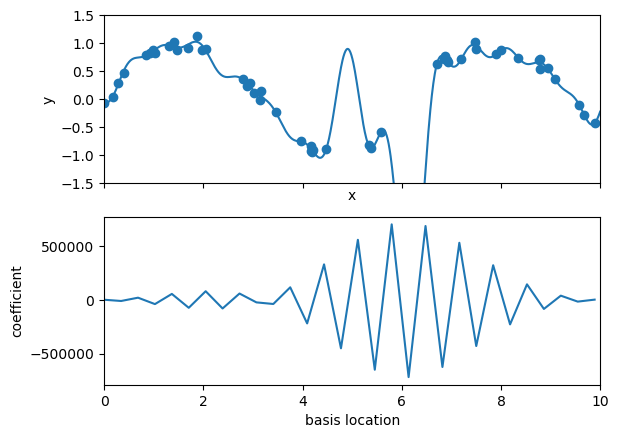

In [18]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

- The lower panel shows the amplitude of the basis function at each location
- This is typical overfitting behavior when basis function overlap
- The coefficient of adjacent basis functions blow up and cancel each other
- Such behavior is problematic 
- It is better to limit such spikes by penalizing large values of the model parameters.
- Such a penalty is Known as $regularization$, and comes in several form

### Ridge regression ($L_{2}$ regularization)

- The most common form of $regularization$ is *ridge regularization* or $L_{2}$ *regularization*
- It penalizes the sum of squares (2-norms) of the model coefficients
- In this case the penalty on the model fit would be:

$\large P = \alpha \sum_{n=1}^N \theta_{n}^2$

- $\alpha$ is free parameter that controls the strength of the penality
- We can utilize the in-built penalized model of Scikit-Learn $\texttt {Ridge}$ estimator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

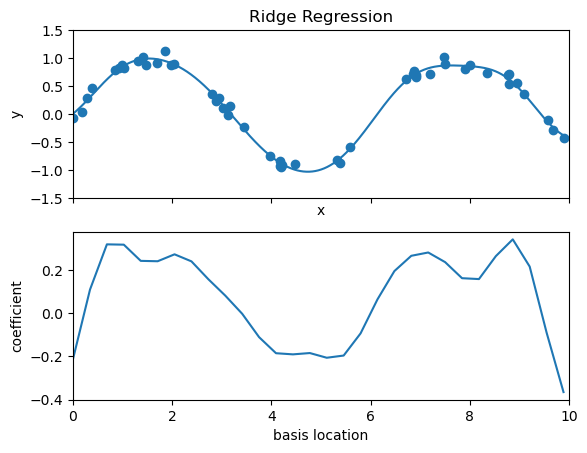

In [42]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

- $\alpha$ is a knob controlling the complexity of the resulting model.
- $\alpha \rightarrow 0$, we recover the standard linear regression result
- $\alpha \rightarrow \infty$, all model responses will be supressed.

### Lasso regularization ($L_{1}$)

- Another type of regularization is known as lasso
- It involves penalizing the sum of absolute values (1- norms) of regression coefficients

$\large P = \alpha \sum_{n=1}^N |\theta_{n}|$

- Due to geomatric reasons lasso regression tends to favor sparse models
- It preferentially sets model coefficients to exactly zero.

- Using $L_{1}$ normalized coefficients

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

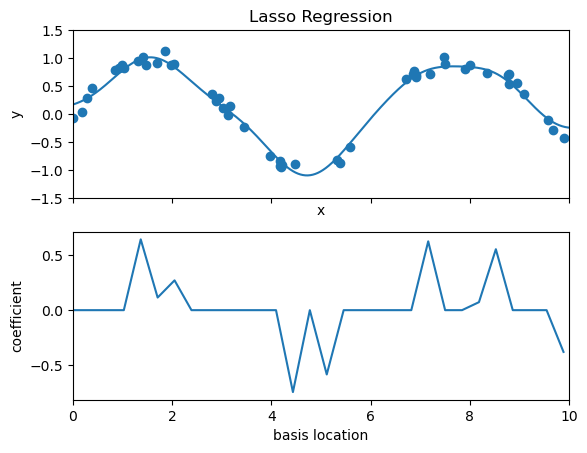

In [49]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.005))
basis_plot(model, title='Lasso Regression')

- With lasso regression penalty, the majority of the coefficients are exactly zero
- As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty and should be determined via 
cross-validation